# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_dirty = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_dirty

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mouse_data_dirty = mouse_data_dirty.rename(columns={"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen", "Weight (g)": "Weight", 
                                                    "Tumor Volume (mm3)": "Tumor_Volume", "Metastatic Sites": "Metastatic_Sites"})

In [3]:
mouse_data_dirty.info()
mouse_data_dirty.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          1893 non-null   object 
 1   Drug_Regimen      1893 non-null   object 
 2   Sex               1893 non-null   object 
 3   Age_months        1893 non-null   int64  
 4   Weight            1893 non-null   int64  
 5   Timepoint         1893 non-null   int64  
 6   Tumor_Volume      1893 non-null   float64
 7   Metastatic_Sites  1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
dirty_mouse_count = mouse_data_dirty.Mouse_ID.nunique()
dirty_mouse_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#mouse_data_dirty.groupby(["Mouse_ID", "Timepoint"]).size().sort_values()
mouse_data_dirty.groupby(["Mouse_ID", "Timepoint"]).size().sort_values()

Mouse_ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
mask = mouse_data_dirty["Mouse_ID"] == "g989"
mouse_data_dirty.loc[mask]

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_data_dirty["Mouse_ID"] != "g989"
mouse_data = mouse_data_dirty.loc[mask].reset_index(drop=True)

mouse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          1880 non-null   object 
 1   Drug_Regimen      1880 non-null   object 
 2   Sex               1880 non-null   object 
 3   Age_months        1880 non-null   int64  
 4   Weight            1880 non-null   int64  
 5   Timepoint         1880 non-null   int64  
 6   Tumor_Volume      1880 non-null   float64
 7   Metastatic_Sites  1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_data.Mouse_ID.nunique()
mouse_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
avg_tumor = mouse_data.groupby("Drug_Regimen")["Tumor_Volume"].mean()
med_tumor = mouse_data.groupby("Drug_Regimen")["Tumor_Volume"].median()
var_tumor = mouse_data.groupby("Drug_Regimen")["Tumor_Volume"].var()
std_tumor = mouse_data.groupby("Drug_Regimen")["Tumor_Volume"].std()
sem_tumor = mouse_data.groupby("Drug_Regimen")["Tumor_Volume"].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Volume": avg_tumor,
    "Median Volume": med_tumor,
    "Variance": var_tumor,
    "Standard Deviation": std_tumor,
    "SEM": sem_tumor
    })

summary_df

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_data.groupby("Drug_Regimen").agg({"Tumor_Volume": ["mean", "median", "var", "std", "sem"]})

Tumor_Volume                                          
                     mean     median        var       std       sem
Drug_Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

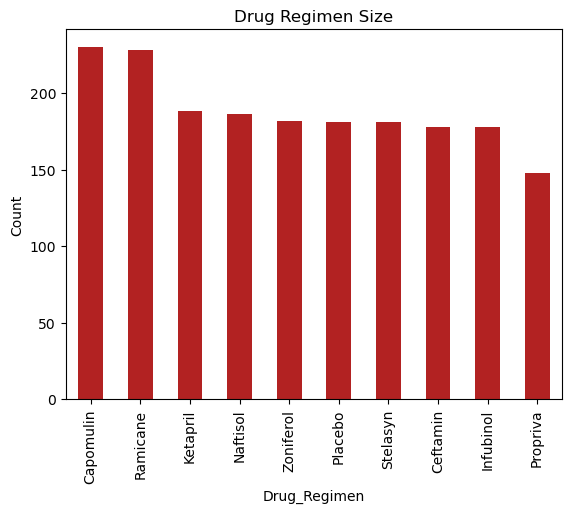

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data.groupby("Drug_Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="firebrick")
plt.show()

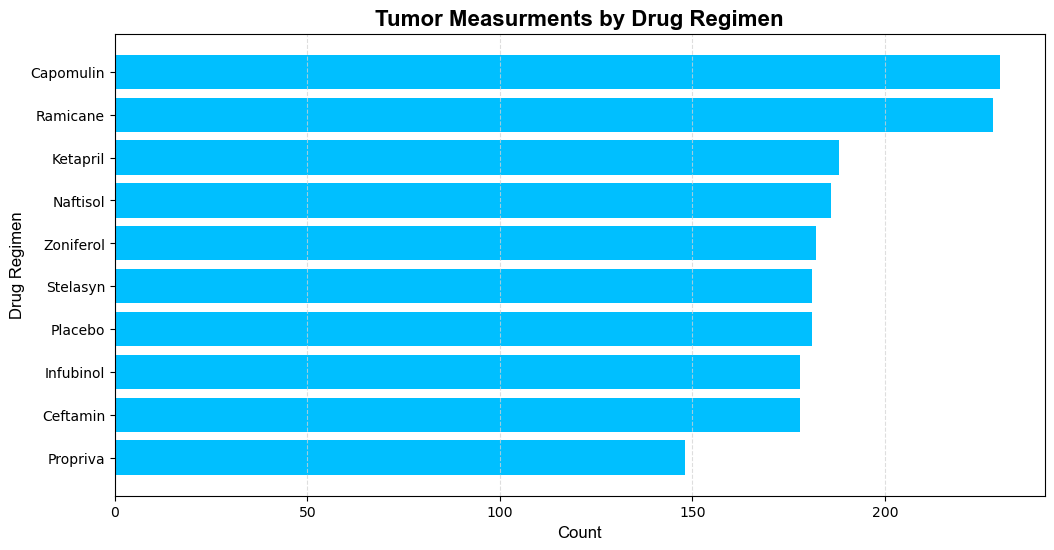

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data Viz Recipe
data = mouse_data.groupby("Drug_Regimen").size().sort_values(ascending=False).head(10).sort_values(ascending=True)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.barh(data.index, data.values, color="deepskyblue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.xlabel("Count", fontfamily="Arial", fontsize=12)
plt.title("Tumor Measurments by Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="x", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [13]:
mice = mouse_data[["Mouse_ID", "Sex"]].drop_duplicates()
mice.head()

,Mouse_ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male


In [14]:
mice.value_counts("Sex")

Sex
Male      125
Female    123
Name: count, dtype: int64

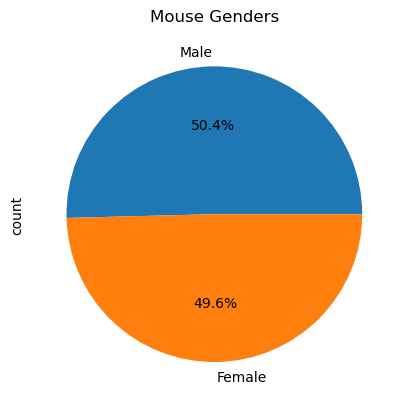

In [15]:
 # Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
data = mice.value_counts("Sex")

# Make the pie chart
data.plot(kind="pie", title="Mouse Genders", autopct="%1.1f%%")
plt.show()

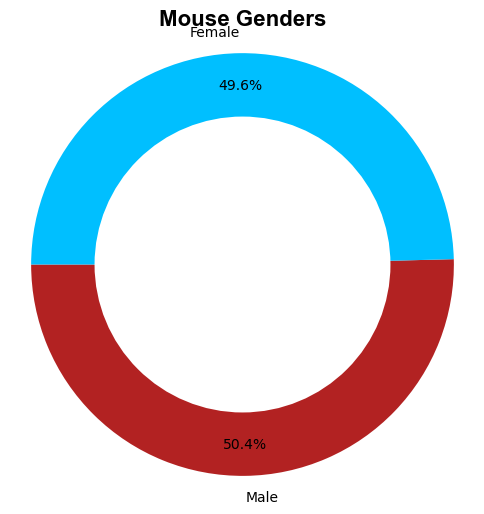

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
data = mice.value_counts("Sex")

# Make the pie chart

# Change Canvas Size
plt.figure(figsize=(6, 6))
    
# Create a basic plot
plt.pie(data.values, labels=data.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85, colors = ["Firebrick", "DeepSkyBlue"])
    
# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)
    

# Add Labels/Title
plt.title("Mouse Genders", fontweight="bold", fontsize=16, fontfamily="Arial")
    
# Set X/Y Limits
plt.axis("equal")
    
# Show/Save the Graph
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time = mouse_data.groupby("Mouse_ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumors = pd.merge(final_time, mouse_data, on=["Mouse_ID", "Timepoint"], how="left")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = final_tumors["Drug_Regimen"].isin(drugs)
final_treated = final_tumors.loc[mask].reset_index(drop=True)

final_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          100 non-null    object 
 1   Timepoint         100 non-null    int64  
 2   Drug_Regimen      100 non-null    object 
 3   Sex               100 non-null    object 
 4   Age_months        100 non-null    int64  
 5   Weight            100 non-null    int64  
 6   Tumor_Volume      100 non-null    float64
 7   Metastatic_Sites  100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


In [18]:
final_treated.head()

,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight,Tumor_Volume,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_treated['Drug_Regimen'].unique()


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Iterate through each treatment
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_treated.loc[final_treated['Drug_Regimen'] == treatment, 'Tumor_Volume']

    # add subset
    tumor_volumes.append(treatment_data)


    # Calculate IQR for outlier detection
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")

Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


In [20]:
tumor_volumes

[0     67.973419
 1     65.525743
 6     57.031862
 8     66.083066
 14    72.226731
 15    36.321346
 18    60.969711
 20    62.435404
 22    60.918767
 31    67.289621
 41    66.196912
 42    62.117279
 52    47.010364
 55    60.165180
 57    55.629428
 58    45.699331
 60    54.656549
 69    55.650681
 79    46.250112
 80    54.048608
 81    51.542431
 85    50.005138
 86    58.268442
 93    67.685569
 99    62.754451
 Name: Tumor_Volume, dtype: float64,
 2     62.999356
 10    45.000000
 11    56.057749
 13    55.742829
 23    48.722078
 28    47.784682
 36    61.849023
 39    68.923185
 43    67.748662
 44    57.918381
 46    46.784535
 47    59.851956
 48    64.299830
 56    59.741901
 59    61.433892
 61    64.192341
 74    45.000000
 75    52.925348
 76    45.000000
 84    67.527482
 89    45.000000
 91    64.634949
 92    61.386660
 95    68.594745
 97    64.729837
 Name: Tumor_Volume, dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    3

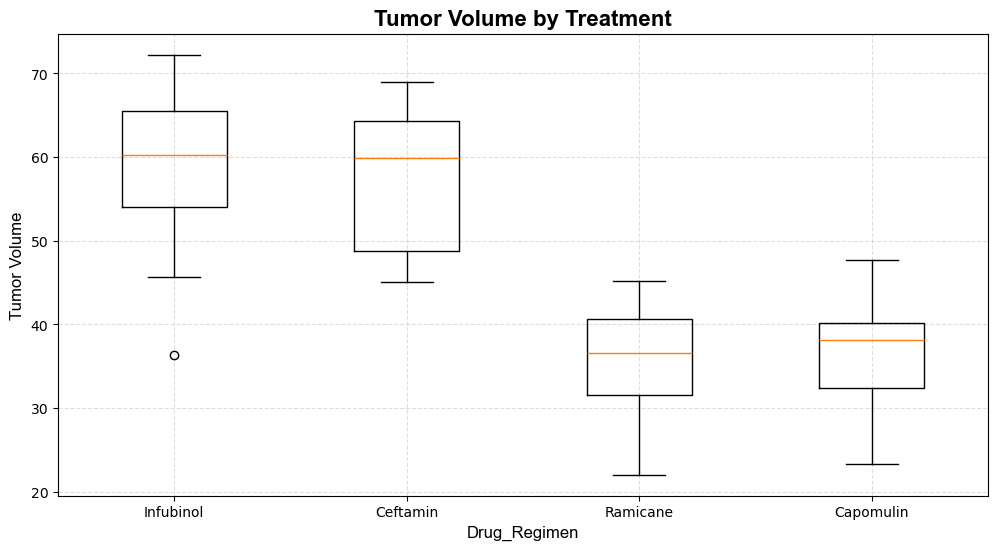

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.boxplot(tumor_volumes, tick_labels=treatments)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("Tumor Volume", fontfamily="Arial", fontsize=12)
plt.xlabel("Drug_Regimen", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Treatment", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Line and Scatter Plots

In [22]:
final_treated

,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight,Tumor_Volume,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Isolate on Mouse and all of its timepoints
mouse = "y793"

mouse_tumor = mouse_data.loc[mouse_data["Mouse_ID"] == mouse].sort_values(by="Timepoint", ascending=True)

In [24]:
mouse_tumor

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


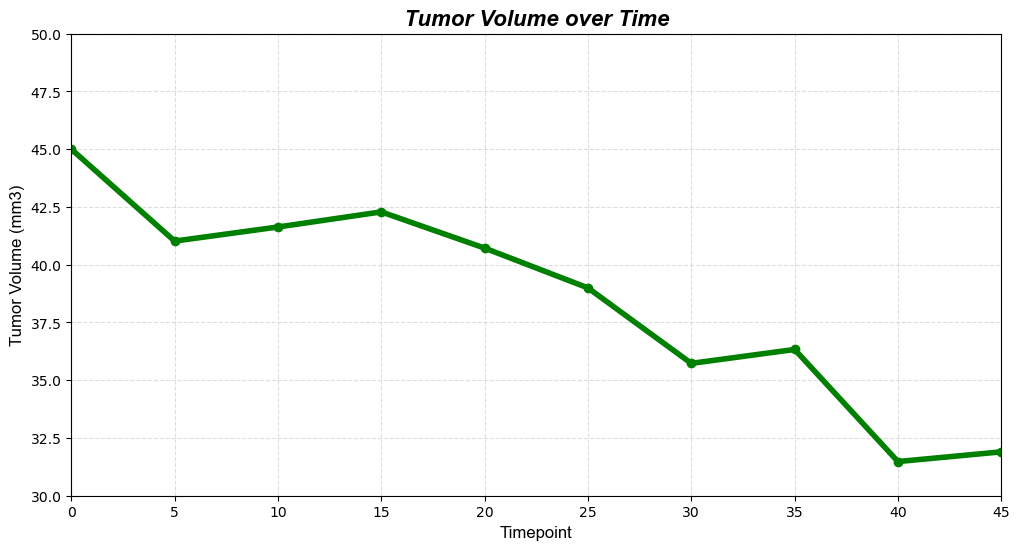

In [25]:
# Make the plot

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(mouse_tumor.Timepoint, mouse_tumor.Tumor_Volume, color="green", marker="o", linewidth=4, markersize=6)


# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Timepoint", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume over Time", fontweight="bold", fontsize=16, fontfamily="Arial", fontstyle="italic")

# Set X/Y Limits
plt.ylim(30, 50)
plt.xlim(0, 45)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Isolate Capomulin
drug = "Capomulin"

cap_tumor = mouse_data.loc[mouse_data["Drug_Regimen"] == drug]
cap_tumor

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


In [27]:
# Find the average weight and tumor size of each mouse
avg_cap_tumor = cap_tumor.groupby("Mouse_ID").agg({"Tumor_Volume": "mean", "Weight": "mean"}).reset_index()
avg_cap_tumor

,Mouse_ID,Tumor_Volume,Weight
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


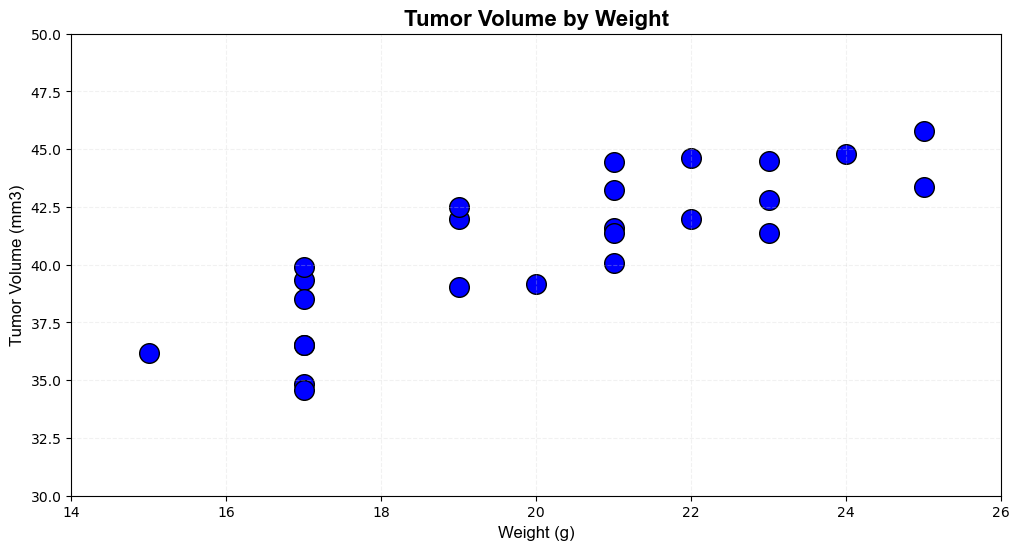

In [28]:
# Make the graph

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_cap_tumor.Weight, avg_cap_tumor.Tumor_Volume, color="blue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Weight", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(30, 50)
plt.xlim(14, 26)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.3)

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Add the linear regression equation and line to plot
x_values = avg_cap_tumor["Weight"]
y_values = avg_cap_tumor["Tumor_Volume"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


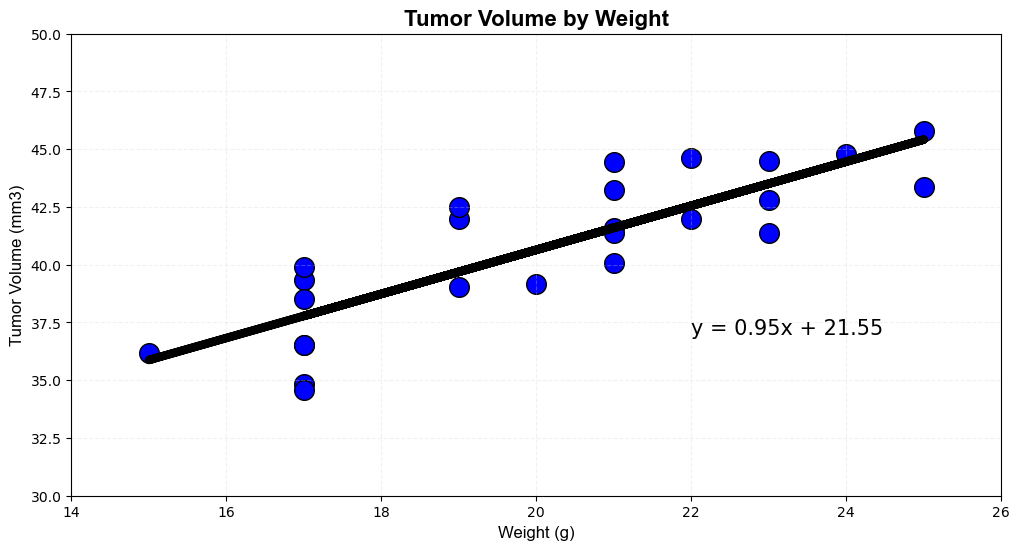

In [30]:
# Make the graph

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(avg_cap_tumor.Weight, avg_cap_tumor.Tumor_Volume, color="blue", edgecolor="black", s=200)
plt.plot(avg_cap_tumor.Weight, regress_values, color="black", linewidth=6) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Weight", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(30, 50)
plt.xlim(14, 26)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.3)

# Annotate
plt.annotate(line_eq, (22, 37), fontsize=15, color="black")

# Show/Save the Graph
plt.show()